# Diabetes Prediction - Predict the probability of a patient having diabetes

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Exploratory Data Analysis

In [3]:
#reading in the dataset
diabetes = pd.read_csv('diabetes.csv')
diabetes.shape

(768, 9)

In [4]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


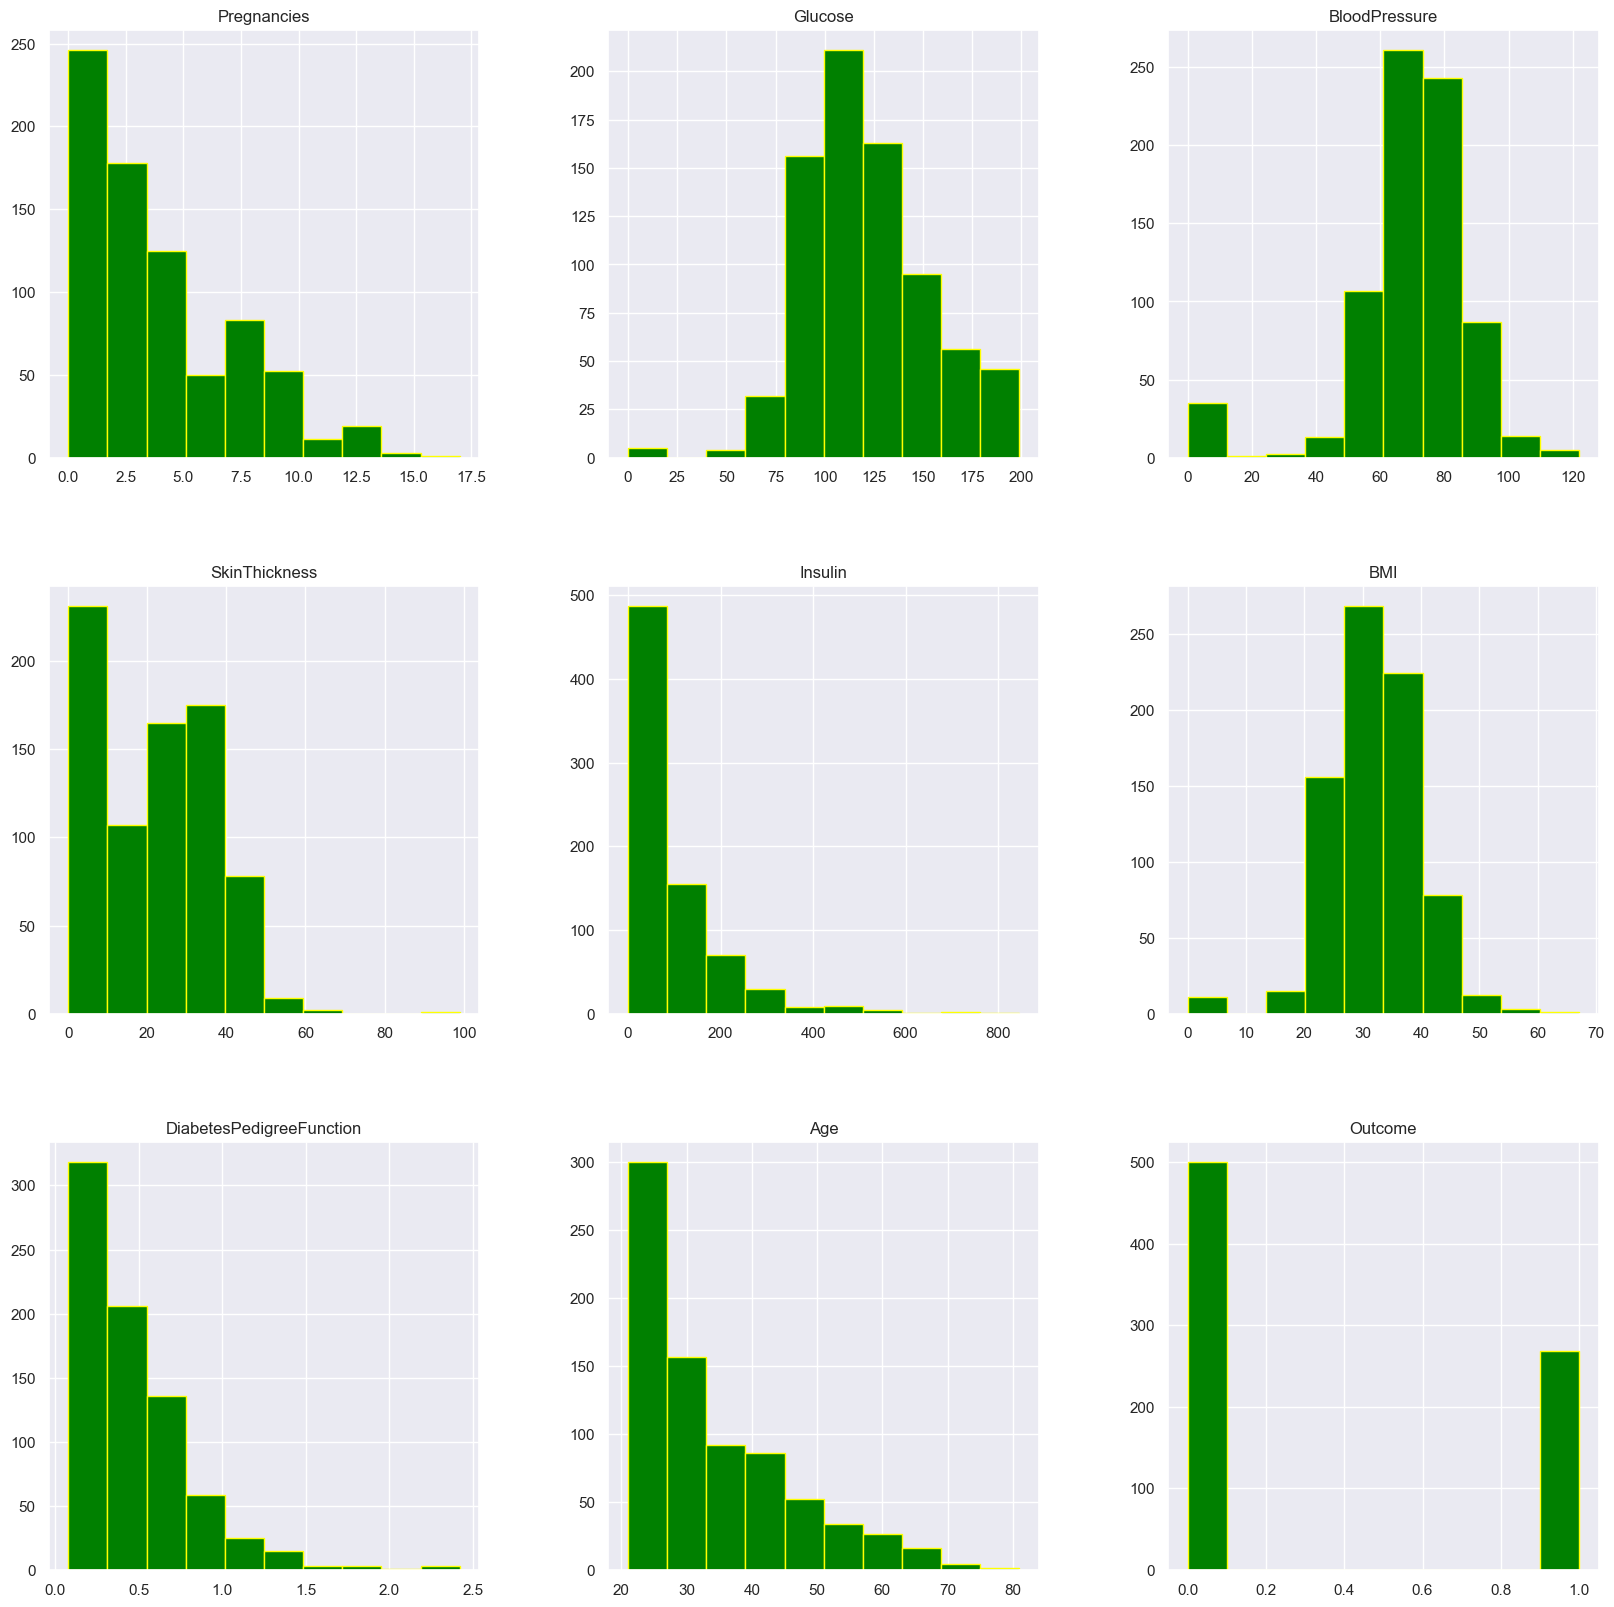

In [5]:
d = diabetes.hist(figsize = (20,20), color='green', edgecolor='yellow')

## Data Cleaning

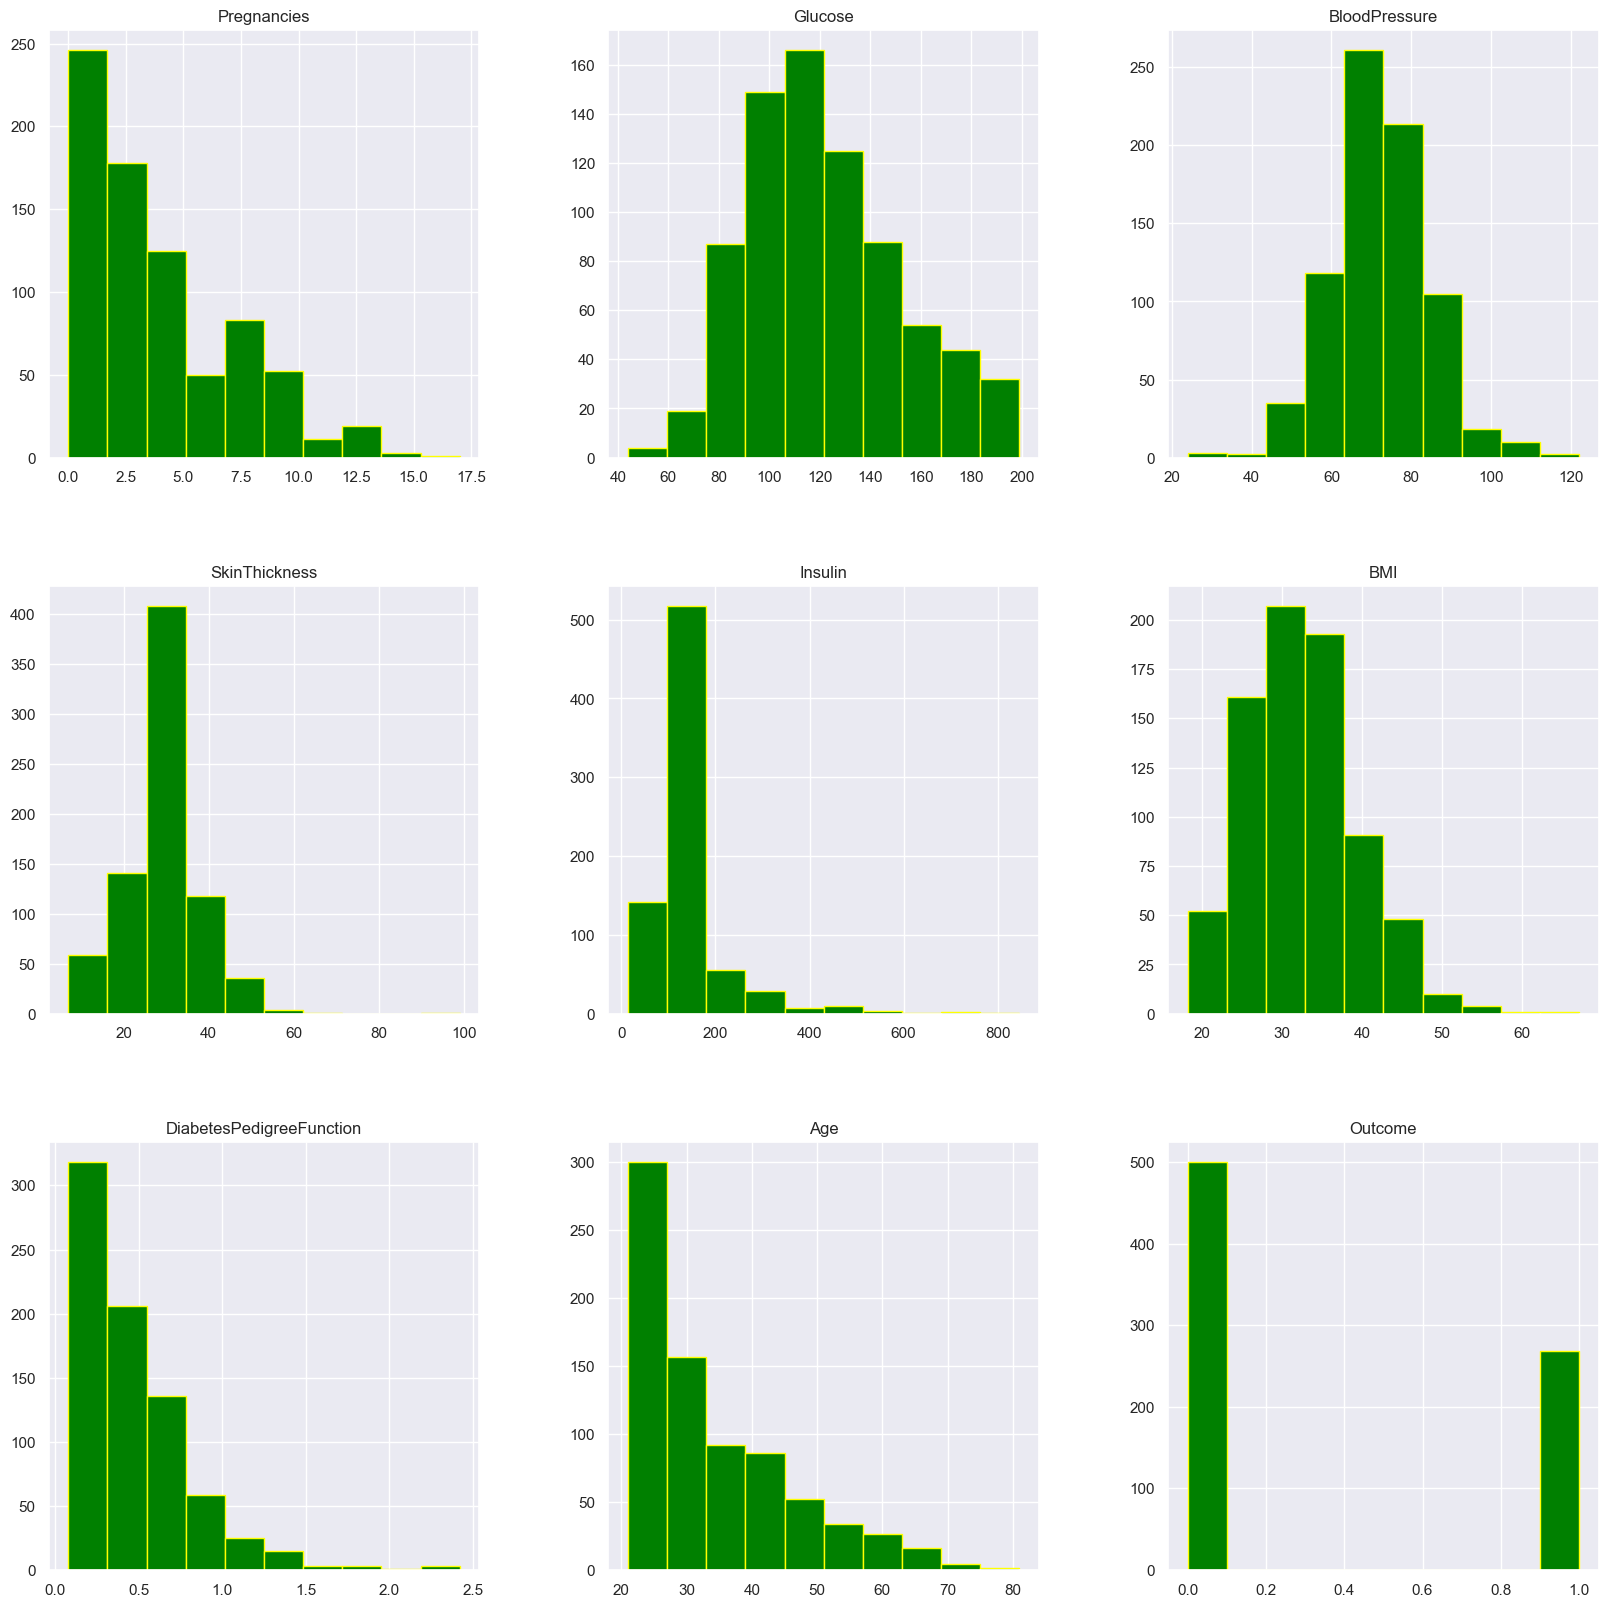

In [6]:
#replace zeros beacuse it might affect the outcome

replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in replace_zero:
    diabetes[column] = diabetes[column].replace(0, np.NaN)       #replace 0 with no data
    mean = int(diabetes[column].mean(skipna=True))               # find the mean of the column
    diabetes[column] = diabetes[column].replace(np.NaN, mean)    #replaces the NaN with mean
d = diabetes.hist(figsize = (20,20),color='green', edgecolor='yellow')

Outcome
0    500
1    268
Name: count, dtype: int64


Text(0.5, 1.0, 'Diabetes Outcome')

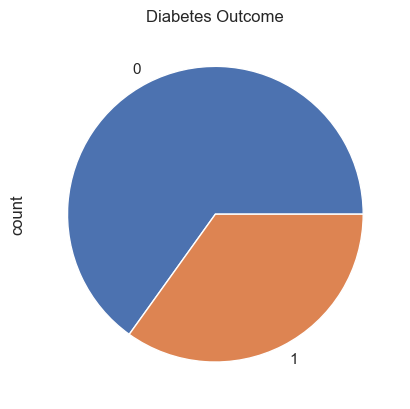

In [7]:
print(diabetes.Outcome.value_counts())
diabetes['Outcome'].value_counts().plot(kind='pie').set_title('Diabetes Outcome')

<Axes: xlabel='Age', ylabel='Glucose'>

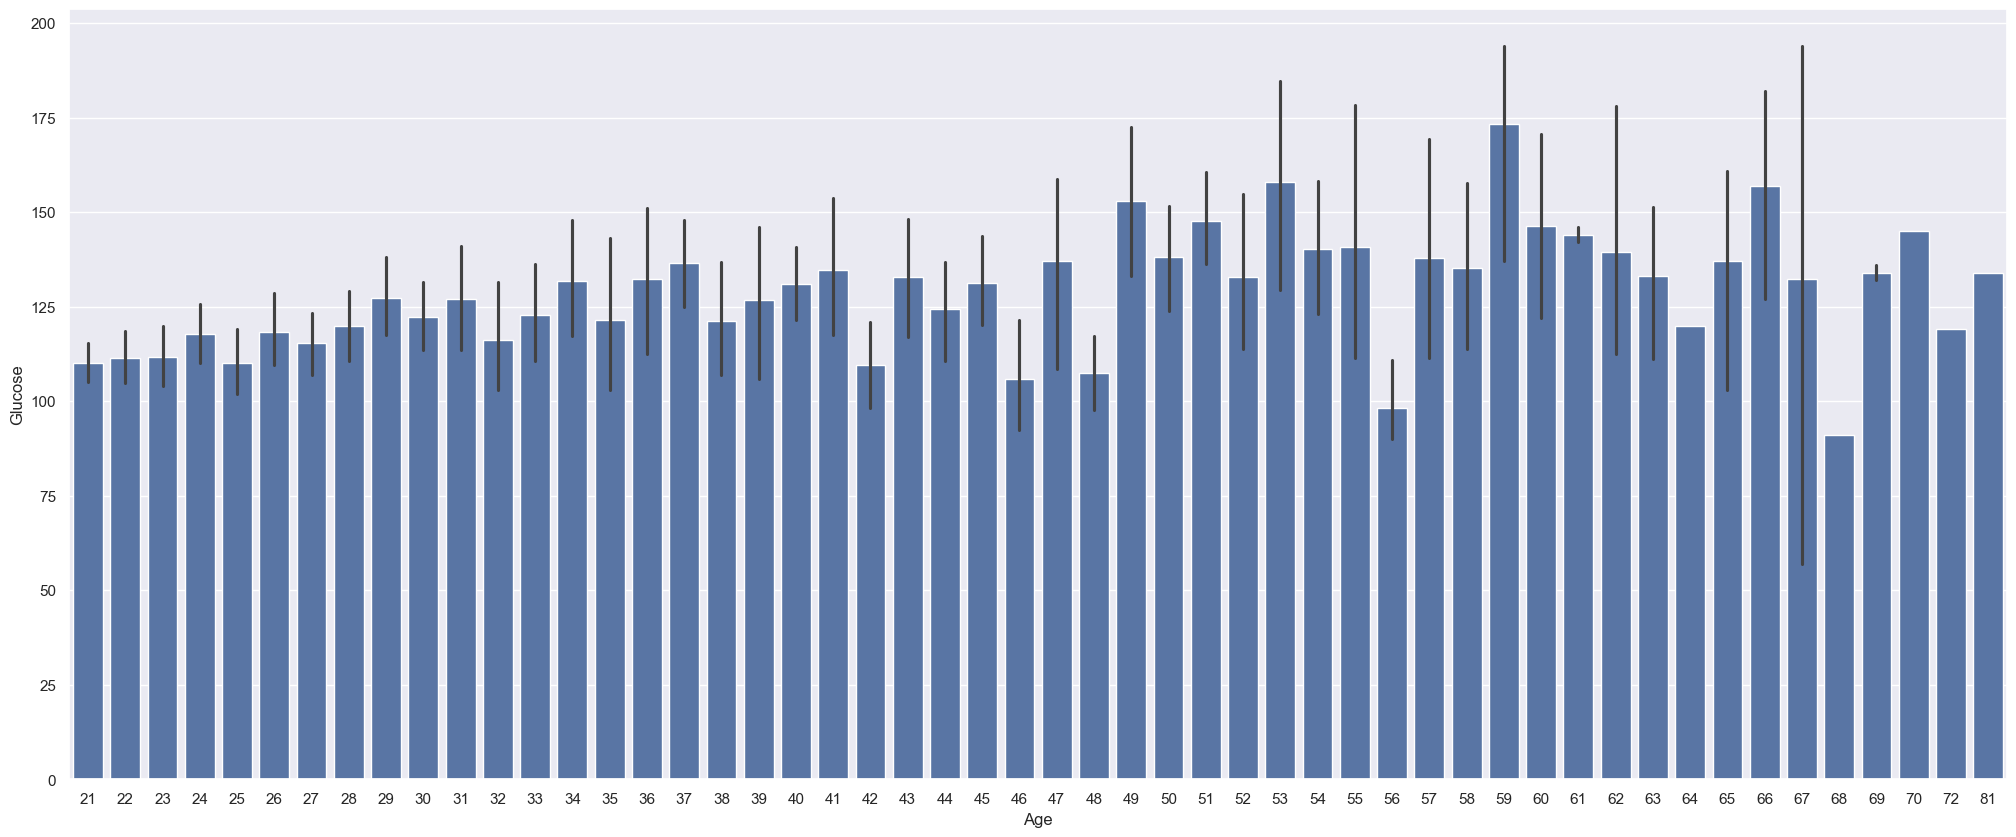

In [8]:
f, ax = plt.subplots(figsize= (25,10))
sns.barplot(x = diabetes['Age'], y = diabetes['Glucose'])

Text(0, 0.5, 'Age of Patient')

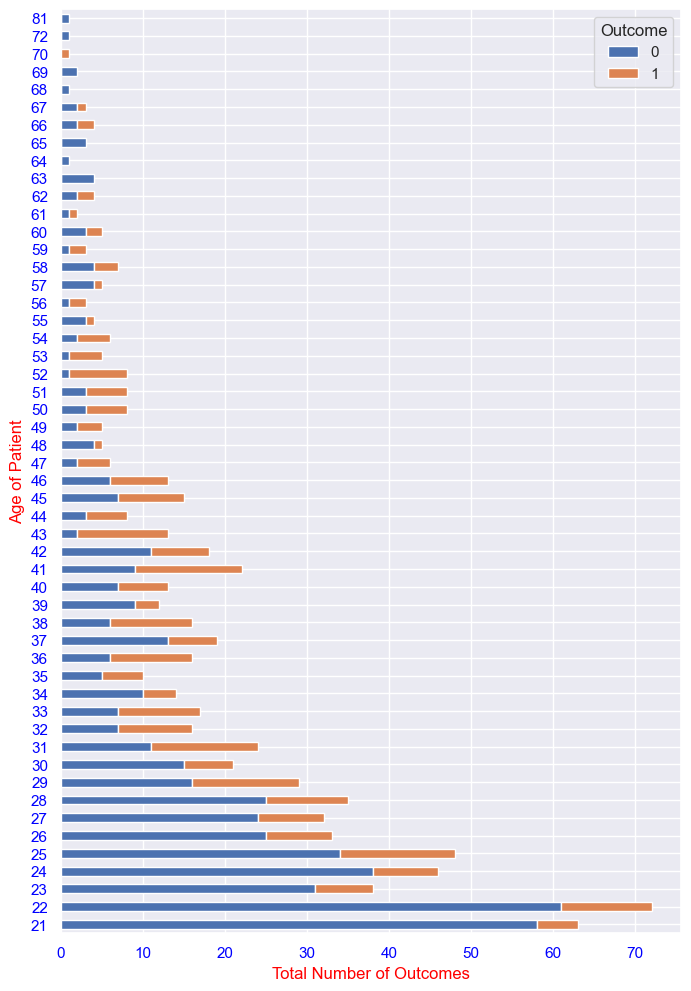

In [9]:
data_grouped = diabetes.groupby(['Age','Outcome'])['Outcome'].count().unstack()
data_grouped.plot(kind='barh', stacked=True, figsize= (8,12), edgecolor= 'white') 
plt.xticks(color='blue')
plt.yticks(color='blue')
plt.xlabel('Total Number of Outcomes', color='red', fontsize=12)
plt.ylabel('Age of Patient', color='red', fontsize=12)

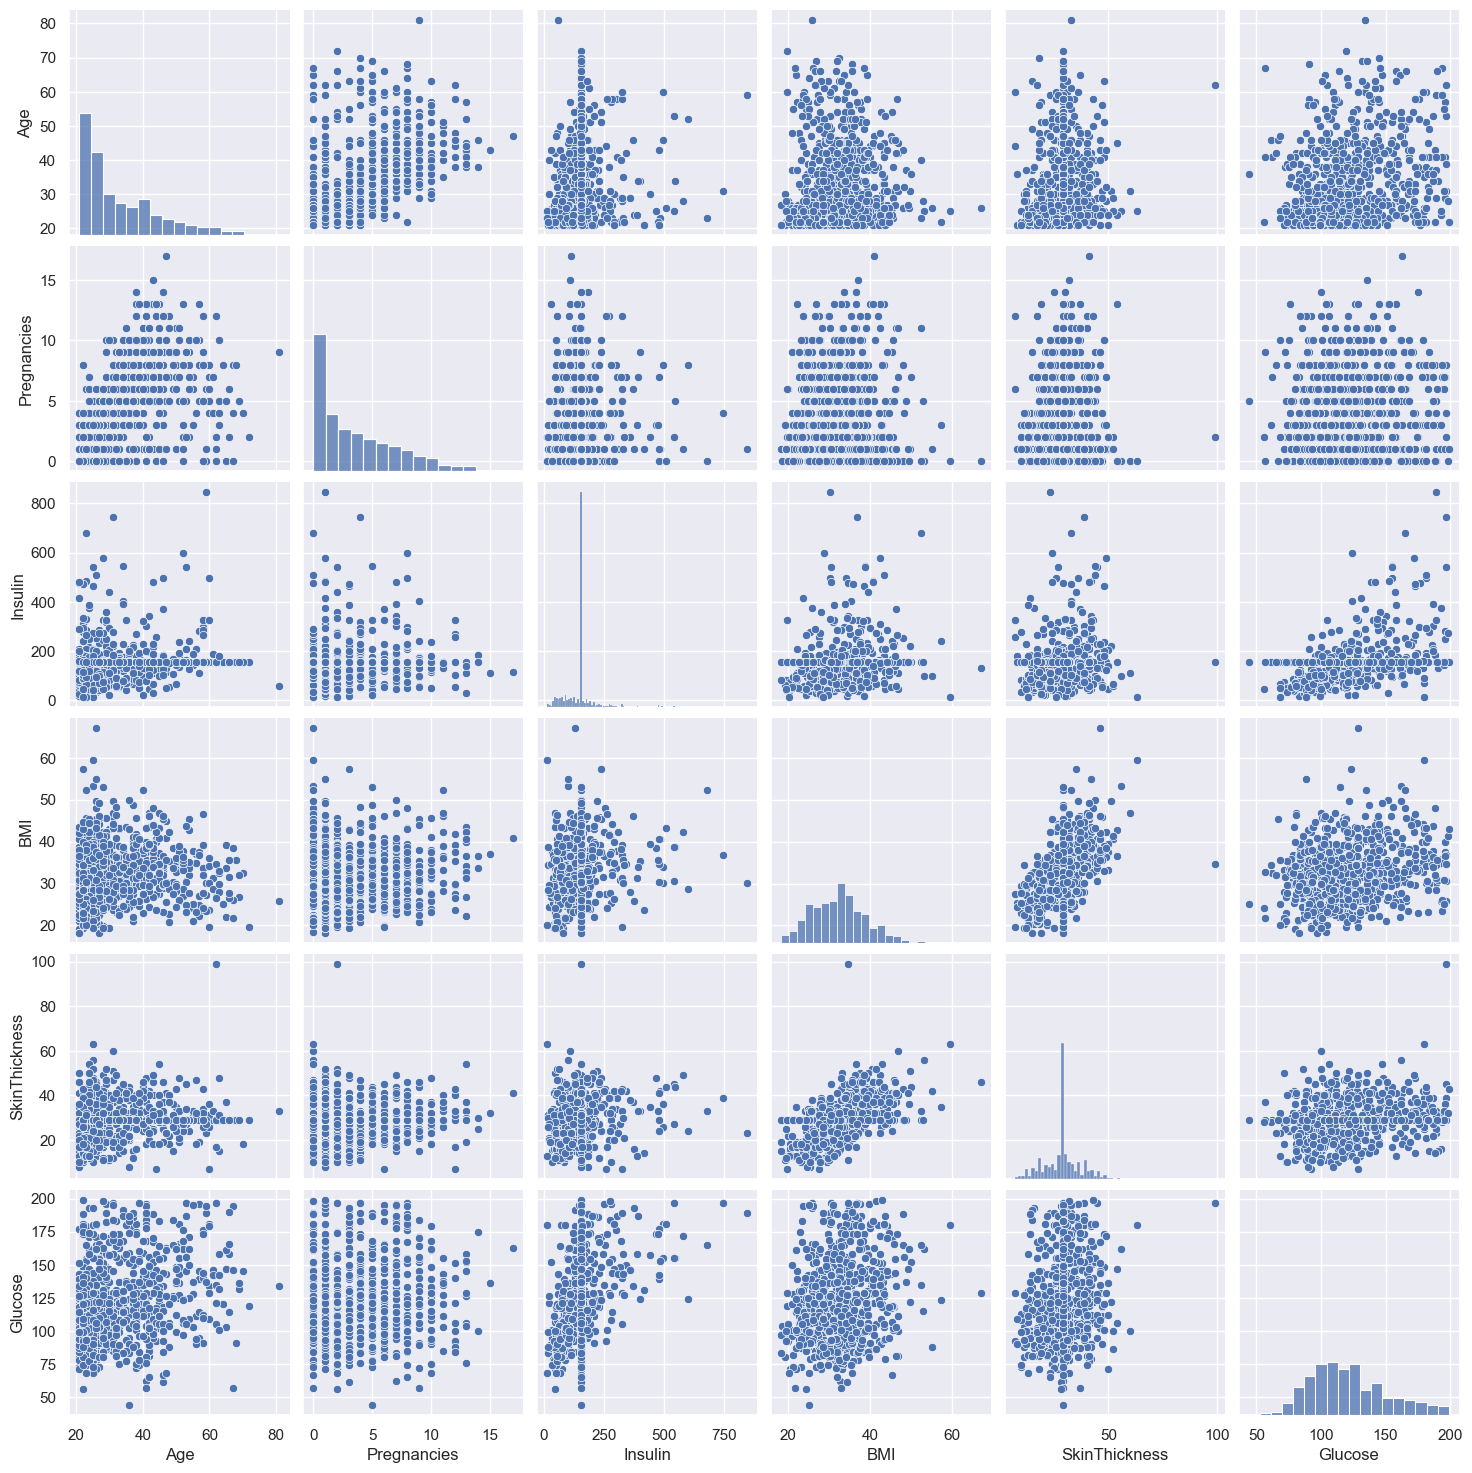

In [10]:
sns.pairplot(diabetes[['Age','Pregnancies','Insulin', 'BMI', 'SkinThickness', 'Glucose']])

# Feature Engineering

In [11]:
# from lazypredict.Supervised import LazyClassifier

# from sklearn.datasets import load_breast_cancer

# from sklearn.model_selection import train_test_split

# data = load_breast_cancer()

# X = data.data
# y = data.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# models, predictions = clf.fit(X_train,X_test, y_train, y_test)  

# print(models)

In [12]:
#split data
a = diabetes.iloc[:, 0:8]
b = diabetes.iloc[:, 8]
a_train, a_test, b_train, b_test = train_test_split(a, b, random_state=0,test_size=0.2)

In [13]:
#Standardize the data - Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_a = StandardScaler()
a_train = sc_a.fit_transform(a_train)
a_test = sc_a.transform(a_test)

# Building the model

In [14]:
#define the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(a_train,b_train)

LogisticRegression()

In [15]:
b_pred=model.predict(a_test)

# Model Evaluation

In [16]:
print("Accuracy Score Is : ",accuracy_score(b_test, b_pred))
print("Confusion Matric : ",confusion_matrix(b_test,b_pred))
print("F1-Score : ",f1_score(b_test, b_pred))

Accuracy Score Is :  0.8116883116883117
Confusion Matric :  [[97 10]
 [19 28]]
F1-Score :  0.6588235294117647


In [21]:
# Accuracy Score 
print("Accuracy Score Is : ",accuracy_score(b_test, b_pred))

Accuracy Score Is :  0.8116883116883117


In [22]:
# Confusion Matrix
print("Confusion Matric : ",confusion_matrix(b_test,b_pred))

Confusion Matric :  [[97 10]
 [19 28]]


In [23]:
# F1_Score
print("F1-Score : ",f1_score(b_test, b_pred))

F1-Score :  0.6588235294117647


In [17]:
#Save the model
pickle.dump(model,open('model.pkl','wb'))

In [18]:
model=pickle.load(open('model.pkl','rb'))

In [19]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score

# data = diabetes.iloc[:, 0:8] # your data
# target = diabetes.iloc[:, 8] # your target variable

# models = [
#     RandomForestClassifier(),
#     LogisticRegression(),
#     KNeighborsClassifier()
# ]

# for model in models:
#     score = cross_val_score(model, data, target, cv=5)
#     print(f"Model: {model.__class__.__name__}, Score: {score.mean()}")

**Accuracy obtained from the above is 76% in Logistic regression while using the accuracy_score function it  gives 81% why is that so ?** 

It is likely that you have trained the models and evaluated their performance using different splits of your data.

If you want to make a fair comparison between the accuracy obtained from the above code and the accuracy obtained from accuracy_score, make sure to use the same splits of your data for both processes. Also, make sure that you are using the same model configurations and hyperparameters when evaluating the models' performances.

In [20]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# # Split your data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)
# a_train, a_test, b_train, b_test = train_test_split(a, b, random_state=0,test_size=0.2)

# # Train the models on the training set
# models = [
#     RandomForestClassifier().fit(X_train, y_train),
#     LogisticRegression().fit(X_train, y_train),
#     KNeighborsClassifier().fit(X_train, y_train)
# ]

# # Evaluate the models' performances on the testing set
# for model in models:
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy}")